# Nuages de mots

## Imports et stopwords

In [15]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "rue", "prix", "maison", 
       "an", "agence", "louer","très", "vendre", "bon", "heure", "place", "demande", "ecr", 
       "francs", "grand", "midi", "état", "vend", "belle", "ruo", "avenue", "brux", "nord",
       "fille", "gaz", "bonne", "adr", "vente",  "etc", "neuf", "bon", "libre", "mod", 
       "jours", "mois", "salle", "chambre", "eau", "app", "dés", "près", "grand", "grande", 
       "un", "une", "tél", "occasion", "matin", "soir", "beau", "on", "auto", "tout", "toute",
       "bail", "avant", "après", "jeune", "vieux", "disp", "belge", "belgique", "cuis", "villa",
       "cour", "notaire", "cours", "bel","pers", "bureau", "quart", "pays", "suite", "cap", "peu", 
       "situation", "garage", "mai", "gros", "rossel", "ros", "chez", "centre", "lundi", "mardi", 
       "mercredi", "jeudi", "vendredi", "samedi", "dimanche",  "fer", "mr", "mme", "hôtel", "jardin", 
       "jard", "gar", "porte", "garni", "pension", "bain", "bons", "jour", "écrire", "ans", "part", 
       "ecrire", "heures", "janvier", "lieu", "dame", "par", "rez", "adresser", "loyer", "meuble", 
       "meubles", "bons", "pet", "plusieurs", "neuve", "achat", "mén", "temps", "trav", "sér", 
       "mètres", "lux", "vue", "réf", "ord", "aven", "cherche", "sal", "aveo", "dos", "ler","offre", 
       "petit", "petits", "petites", "lib", "lit", "enf", "fem", "téléphone", "SIT", "faç", "env", 
       "cher","jeu", "jn", "jne", "cause", "mari", "quelques", "quelque", "masmoment", "salon", 
       "chambre", "chambres", "celui", "celle", "lui", "ont", "été", "vers", "pour", "or", "ni", 
       "car", "mais", "où", "et", "enfin", "enfants", "femme", "appart", "lot", "lots", "céder", 
       "prés", "ordre", "bois", "Bruxelles", "Louise", "bruxelles", "chaussée", "français", "conf", "saint", "travail"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [17]:
# Choisir une année
year = 1926

In [18]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [19]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [20]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [21]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

"k r» • .4 * k % X et 3 JANVIER 1926.- LE SOIR * ■<v * iv i • . > AVI S AUX PO RTE U RS D’ACTIONS ap - || DE LA.' Métallurgique ; des Terres Rotige l’.ji'V . ...... . -.7 ■ v¥îSè'ciétôMno»'yin«'ii: :; "

In [22]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [23]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

'k r» • .4 * k % X et 3 JANVIER 1926.- LE SOIR * ■<v * iv i • . > AVI S AUX PO RTE U RS D’ACTIONS ap - || DE LA.\' Métallurgique ; des Terres Rotige l’.ji\'V . ...... . -.7 ■ v¥îSè\'ciétôMno»\'yin«\'ii: :; ‘ ^SÎËG^#<^IAL^!jrMEM^iÔURG : \' " 44, PLACE SAINTE^GATHER|NE?(Çoio d^la rue MISE EN ÉNTE 1, BRUXELLES , -Tes nécéssàlres, jjoùf: rëmûjjïrér l ! a»Bôr£v<jiii .lùl .«était - 5>i Soclëté\'\\M4talîurgïqüe’’4d®®lïfl l, !? s wfftîcf,; â \'ràisdtti Ue\'qùîiti\'e-. actions, lIci:- . \'les Rouges >T oonU\'c^.une pa'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [24]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [25]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1926_clean.txt!'

In [26]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'AVI RTE ACTIONS MÉTALLURGIQUE TERRES ROTIGE ÎSÈ CIÉTÔMNO YIN SÎËG IAL JRMEM IÔURG SAINTE GATHER ÇOIO MISE ÉNTE NÉCÉSSÀLRES JJOÙF RËMÛJJÏRÉR BÔR JIII LÙL SOCLËTÉ LÏFL WFFTÎCF RÀISDTTI QÙÎITI ACTIONS LICI ROUGES OONU PAÏT XRBÈ DÉCOUPEZ ANNONC DÉCIDER YOS ACHATS VOYEZ INTERET EXAUNINER FTOS ARTIÈLES COTONS LINGERIE CHOIX UNIQUE MÈTRE COTONS BLANCS RETORS PÔUR DRAPS LARGEUR MÈTRE CRETONNE RENFORCÉE ARTICLE INCOMPARABLE LARGEUR MÈTRE DRAPS USAGE QUALITÉ BLANC FESTON PAIRE DRAPS CRETONNE BLANCHE EXTRA'

## Nuage de mots

### Afficher les termes les plus fréquents


In [27]:
frequencies = Counter(after.split())
print(frequencies.most_common(100))

[('ANVERS', 411), ('PARIS', 378), ('COMMERCE', 293), ('LONDRES', 246), ('SOCIÉTÉ', 244), ('MARCHÉ', 240), ('VIS', 240), ('RÉFÉR', 237), ('GOUVERNEMENT', 237), ('JUIN', 227), ('BAS', 225), ('LOUISE', 222), ('AVRIL', 219), ('PARTIE', 217), ('BOURSE', 217), ('GARE', 216), ('CENT', 214), ('GÉNÉRAL', 214), ('CONSEIL', 214), ('CHÊNE', 212), ('LIÈGE', 211), ('LEURS', 208), ('HOMME', 207), ('MINISTRE', 207), ('ART', 206), ('CAFÉ', 204), ('OCTOBRE', 202), ('PRÉSIDENT', 200), ('COURANT', 197), ('CONGO', 195), ('JUILLET', 193), ('BONNES', 190), ('SERVICE', 186), ('PLACES', 185), ('CAPITAL', 184), ('COND', 183), ('JEAN', 182), ('SEUL', 182), ('ROYALE', 180), ('PREMIER', 179), ('MODERNE', 179), ('MANGER', 179), ('UNION', 179), ('SERV', 179), ('QUARTIER', 178), ('COM', 177), ('MAGASIN', 174), ('TOUR', 174), ('FOND', 174), ('PIÈCES', 174), ('PIANO', 174), ('DÈS', 173), ('PETITE', 173), ('CONDITIONS', 170), ('DERNIER', 169), ('TORPÉDO', 169), ('FORD', 168), ('PORT', 164), ('PREMIÈRE', 163), ('ÉTAGE', 

### Créer, stocker et afficher le nuage de mots

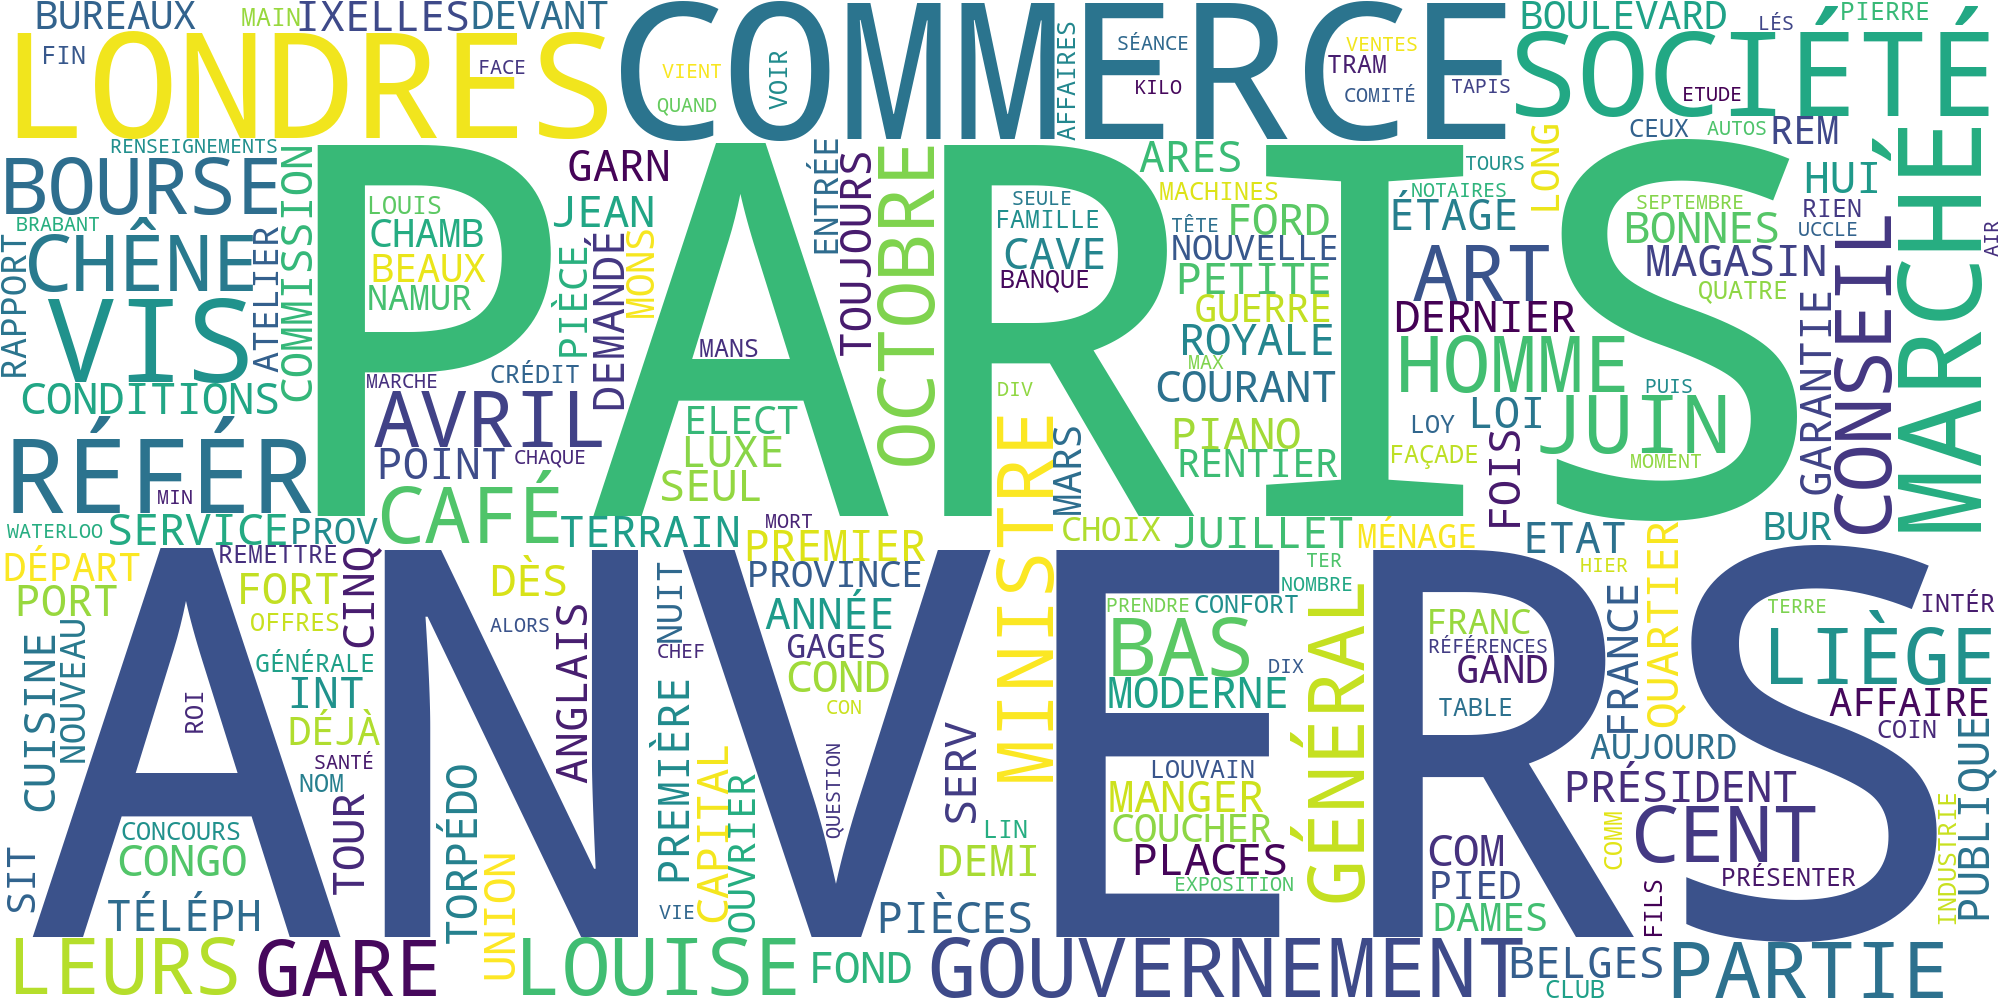

In [28]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))